# Análise dos dados de reembolso dos Senadores - 2020

In [2]:
# importar bibliotecas

import pandas as pd

In [12]:
#carregar os dados do arquivo

df = pd.read_csv('2020.csv',sep=';',encoding='latin1',skiprows=1,decimal=',')

df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,14764742,06/01/2020,Despesa com energia elétrica para uso do escri...,122.62,2141820
1,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,14764741,06/01/2020,Despesa com energia elétrica para uso do escri...,137.75,2141818
2,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",062.135.728-64,FERNANDO WALDEIR PACINI e ANA LUCIA DA SILVA S...,001/2020,06/01/2020,Despesa com pagamento de aluguel de imóvel par...,1000.00,2139025
3,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/20,02/01/2020,Despesa com pagamento de aluguel de imóvel par...,6000.00,2139020
4,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,333871612,25/12/2019,Despesa com pagamento de telefone para uso do ...,323.95,2139044


In [13]:
#verificar o tamanho e tipo dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5483 entries, 0 to 5482
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                5483 non-null   int64  
 1   MES                5483 non-null   int64  
 2   SENADOR            5483 non-null   object 
 3   TIPO_DESPESA       5483 non-null   object 
 4   CNPJ_CPF           5483 non-null   object 
 5   FORNECEDOR         5483 non-null   object 
 6   DOCUMENTO          5219 non-null   object 
 7   DATA               5483 non-null   object 
 8   DETALHAMENTO       2856 non-null   object 
 9   VALOR_REEMBOLSADO  5483 non-null   float64
 10  COD_DOCUMENTO      5483 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 471.3+ KB


In [15]:
#Análise quantitativa dos dados

df.describe()

,ANO,MES,VALOR_REEMBOLSADO,COD_DOCUMENTO
count,5483.0,5483.000000,5483.000000,5.483000e+03
mean,2020.0,2.578151,1312.801364,2.142153e+06
std,0.0,1.227145,2595.692023,1.900190e+03
min,2020.0,1.000000,0.010000,2.138459e+06
25%,2020.0,2.000000,150.000000,2.140588e+06
50%,2020.0,2.000000,399.610000,2.142177e+06
75%,2020.0,3.000000,1442.325000,2.143800e+06
max,2020.0,6.000000,30000.000000,2.145422e+06


In [17]:
#total de reembolsos

df['VALOR_REEMBOLSADO'].sum()

7198089.88

In [19]:
#quantidade de reembolsos por senador

df['SENADOR'].value_counts()

CARLOS VIANA           214
MAJOR OLIMPIO          172
ZEQUINHA MARINHO       170
WELLINGTON FAGUNDES    159
PAULO PAIM             154
                      ... 
CARLOS FÁVARO            8
VANDERLAN CARDOSO        7
JADER BARBALHO           5
ROSE DE FREITAS          4
ORIOVISTO GUIMARÃES      1
Name: SENADOR, Length: 80, dtype: int64

In [23]:
#valor total reembolsado por cada senador

df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

SENADOR
MARCIO BITTAR          194817.24
ACIR GURGACZ           184827.05
NELSINHO TRAD          182511.38
MAILZA GOMES           172071.11
FERNANDO COLLOR        169548.32
                         ...    
ALVARO DIAS             17371.41
STYVENSON VALENTIM       6393.00
VANDERLAN CARDOSO        6048.48
ROSE DE FREITAS          1872.57
ORIOVISTO GUIMARÃES      1548.02
Name: VALOR_REEMBOLSADO, Length: 80, dtype: float64

In [25]:
#tipo de despesa com maior valor de reembolso

df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

TIPO_DESPESA
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                             1978762.07
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           1575428.61
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   1345730.55
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 1223598.92
Divulgação da atividade parlamentar                                                                                                                                

In [27]:
#5 maiores valores reembolsados 

df.nlargest(5,'VALOR_REEMBOLSADO')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
3393,2020,4,MARCIO BITTAR,"Contratação de consultorias, assessorias, pesq...",02.456.658/0001-38,"IDÉIAS ESTRATÉGIA, PLANEJAMENTO E PROJETO LTDA",000.000.105,06/04/2020,Valor pago referente ao serviço de consultoria...,30000.0,2143518
3658,2020,2,NELSINHO TRAD,"Contratação de consultorias, assessorias, pesq...",37.195.146/0001-40,Home Mix Produção e Assessoria em Radiodifusão...,00006445,18/02/2020,Referente ao pagamento da prestação de serviço...,30000.0,2140740
3670,2020,3,NELSINHO TRAD,"Contratação de consultorias, assessorias, pesq...",37.195.146/0001-40,Home Mix Produção e Assessoria em Radiodifusão...,6462,03/03/2020,Referente à prestação de serviços de assessori...,30000.0,2141190
3684,2020,4,NELSINHO TRAD,"Contratação de consultorias, assessorias, pesq...",37.195.146/0001-40,Home Mix Produção e Assessoria em Radiodifusão...,00006538,08/04/2020,"Referente ao pagamento, no mês de abril, da pr...",30000.0,2143616
1007,2020,2,EDUARDO BRAGA,"Contratação de consultorias, assessorias, pesq...",33.055.400/0001-53,L COELHO SERRA,08,04/02/2020,NaN,25000.0,2141180


In [29]:
# 5 menores valores reembolsados


df.nsmallest(5,'VALOR_REEMBOLSADO')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
979,2020,3,DÁRIO BERGER,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL LINHAS AÉREAS INTELIGENTES,SR6BNK,23/03/2020,"Companhia Aérea: GOL, Localizador: SR6BNK. Pas...",0.01,2143009
995,2020,3,DÁRIO BERGER,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,XYEDKX,25/03/2020,"Companhia Aérea: LATAM, Localizador: XYEDKX. P...",0.01,2142997
4922,2020,1,VANDERLAN CARDOSO,"Locomoção, hospedagem, alimentação, combustíve...",25.124.074/0001-60,VALPOSTO COMBUSTIVEIS LTDA,NaN,20/01/2020,NaN,0.12,2141862
3585,2020,2,MARIA DO CARMO ALVES,"Passagens aéreas, aquáticas e terrestres nacio...",13.038.641/0001-87,SERGITUR - SERGIPE TURISMO LTDA,DBUGTJ,14/01/2020,"Companhia Aérea: LATAM, Localizador: DBUGTJ. P...",0.16,2142015
2459,2020,1,JOSÉ SERRA,Aquisição de material de consumo para uso no e...,21.050.733/0001-00,JOTA JORNALISMO S/A,00056190,28/01/2020,Senador José Serra - Despesa com assinatura de...,0.90,2139803


In [31]:
%matplotlib inline

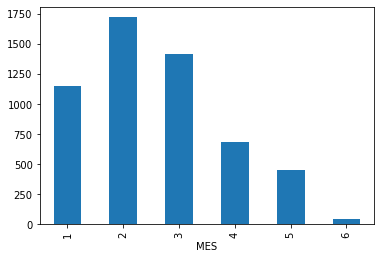

In [37]:
#quantidade de reembolsos por mês

df.groupby('MES')['VALOR_REEMBOLSADO'].count().plot.bar()